# Statistics: basics

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

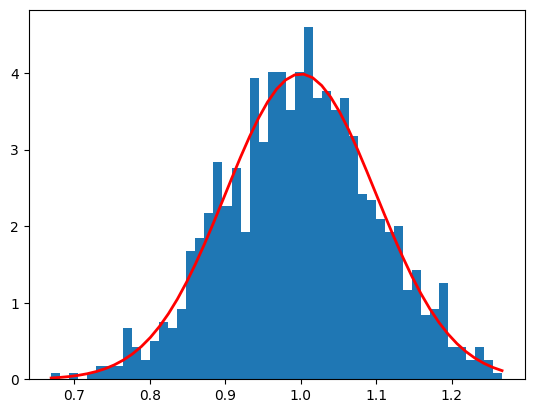

In [2]:
# Random variable, normal distribution
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day
mu, sigma = 1, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.show()


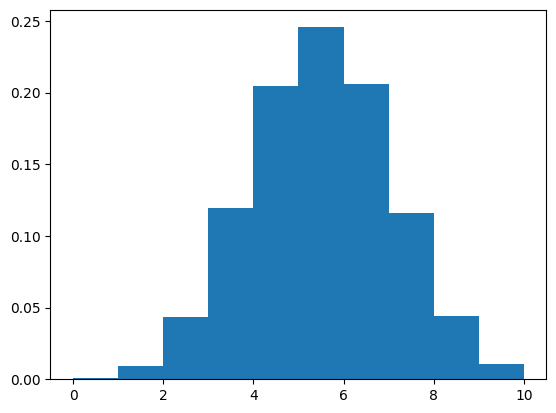

In [3]:
# Random variable, binomial distribution
# x = number of times we throw heads in 10 coin flips
# y = probaility to see x heads

n, p = 10, 0.5 # number of trials, probability of each trial
s = np.random.binomial(n, p, 100000) # 1000 experiments

prob, bins, ignored = plt.hist(s, n, density=True)
plt.show()

In [4]:
prob

array([0.00099, 0.00952, 0.04339, 0.1194 , 0.20442, 0.24563, 0.20589,
       0.11597, 0.04431, 0.01048])

In [5]:
# Expecte value
sum([(i * prob[i]) for i in range(n)])

np.float64(4.9962599999999995)

In [6]:
#s.mean()
np.median(s)

np.float64(5.0)

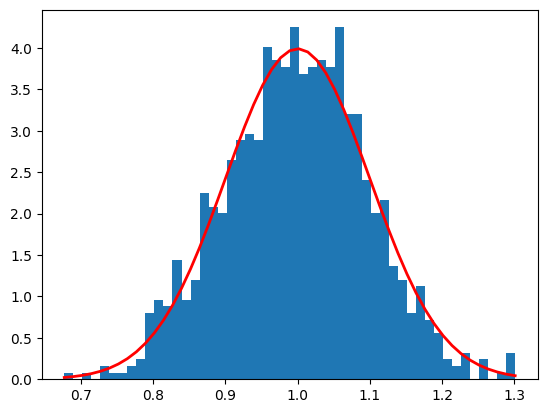

In [7]:
# Random variable, normal distribution - in more details
# x = meat consumption from Silpo over the last 1000 days
# y = probability that x meat amount will be bought on a given day

mu, sigma = 1, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 1000)

prob, bins, ignored = plt.hist(x, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()


In [8]:
from scipy.stats import norm

probability_pdf = norm.pdf(0.85, loc=mu, scale=sigma) # probability density function
print(probability_pdf)

1.2951759566589167


In [9]:
x.mean()

np.float64(0.9984000718204451)

In [10]:
# Variance (dispersion) and Standard Deviation
var = np.sum((x - x.mean())**2) / len(x) # variance
std = np.sqrt(np.sum(((x-x.mean())**2)) / len(x)) # standard deviation

print(var, std)

0.009669693491790322 0.09833459966761608


In [11]:
# Standard deviatrion in numpy
np.std(x)

np.float64(0.09833459966761608)

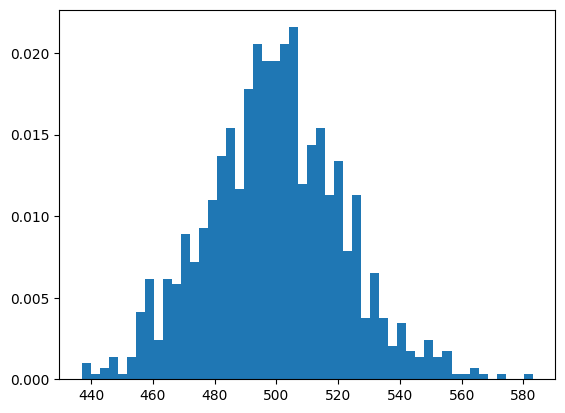

In [12]:
# new variable z = number of active cupons for discount on meat
z = np.random.poisson(500, 1000)
prob, bins, ignored = plt.hist(z, 50, density=True)
plt.show()

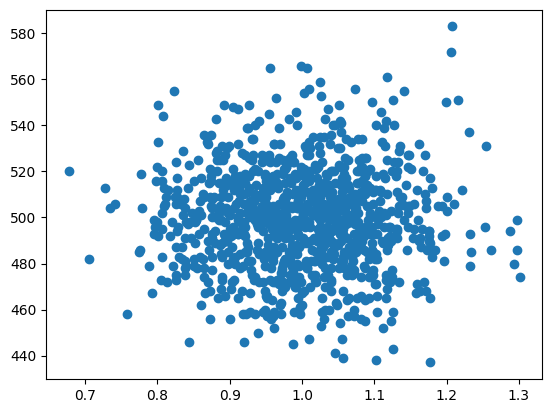

In [13]:
plt.scatter(x,z)

In [14]:
np.cov(x,z)[0][1] # covariance

np.float64(0.003982934189258318)

In [15]:
# Кореляція - це коваріація, нормалізована на добуток стандартних відхилень
np.corrcoef(x,z)[0][1] # correlation


np.float64(0.0018327155794796754)

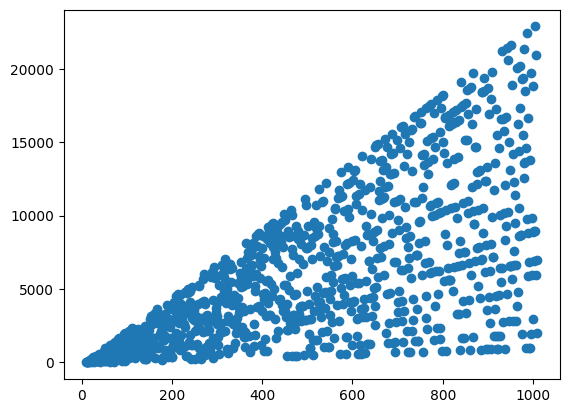

In [16]:
u = np.arange(10, 1010)
j = np.arange(0, 1000)*np.random.randint(1,24, size=(1000))
plt.scatter(u,j)

In [17]:
np.cov(u, j)[0][1] # covariance

np.float64(974345.6031031031)

In [18]:
np.corrcoef(u,j)[0][1] # correlation    

np.float64(0.6528717232400364)

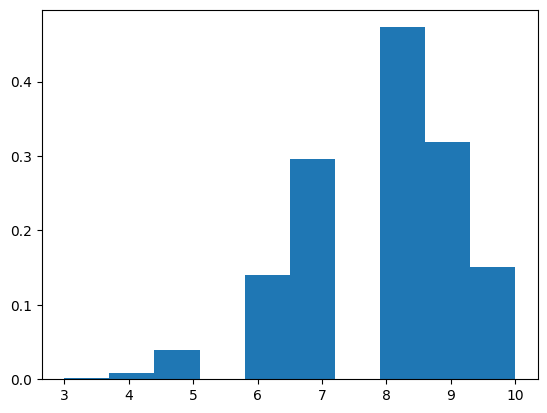

In [19]:
# Central Limit Theorem (Центральна гранична теорема)
N = 100000000 # number of experiments
n = 1000 # number of trials
s = np.random.binomial(10, 0.8, N) # One side of the coin is havier than the other (probability of heads is 0.8)
s = s.reshape(N//n, n)

prob, bins, ignored = plt.hist(s[0], 10, density=True)
plt.show()

In [20]:
s_mean = s.mean(axis=1)
s_mean

array([7.919, 7.946, 7.994, ..., 7.916, 7.998, 8.007], shape=(100000,))

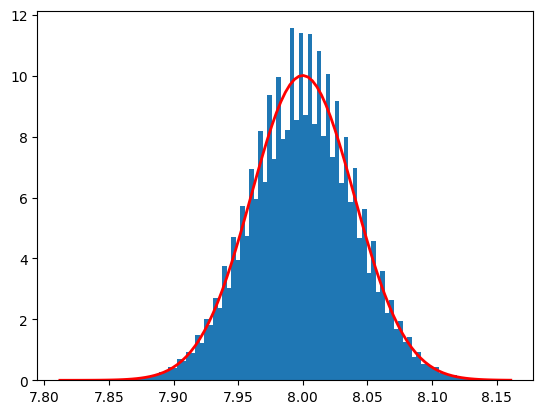

In [21]:
sigma = s_mean.std()
mu = s_mean.mean()

prob, bins, ignored = plt.hist(s_mean, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

# Pandas

In [22]:
import pandas as pd
mountain_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])

print(mountain_height.describe())

count       5.000000
mean     2032.840000
std        17.304421
min      2016.400000
25%      2022.500000
50%      2028.500000
75%      2035.800000
max      2061.000000
dtype: float64


In [23]:
mountains_height = pd.Series( data=[2061, 2035.8, 2028.5, 2022.5, 2016.4],
                              index=['Hoverla', 'Berbenskyl',  'Pip Ivan', 'Petros', 'Gutin-Tomnatyk'],
                              name = 'Height, m',
                              dtype = float,)
mountains_height


Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros            2022.5
Gutin-Tomnatyk    2016.4
Name: Height, m, dtype: float64

In [24]:
print(mountains_height['Petros'])
#print(mountains_height[2]) # deprecated way
print(mountains_height.iloc[2]) # recommended way to get value by index


2022.5
2028.5


In [25]:
print(mountains_height[1:4])
print(mountains_height[mountains_height > 2020]) # only mountains higher than 2020 m
print(mountains_height>2020) # all mountains with boolean mask
print(mountains_height["Berbenskyl":"Petros"])
print(mountains_height.Petros)
print("Hoverla" in mountains_height)

Berbenskyl    2035.8
Pip Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64
Hoverla       2061.0
Berbenskyl    2035.8
Pip Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64
Hoverla            True
Berbenskyl         True
Pip Ivan           True
Petros             True
Gutin-Tomnatyk    False
Name: Height, m, dtype: bool
Berbenskyl    2035.8
Pip Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64
2022.5
True


In [26]:
sort_index = mountains_height.sort_index()
sort_index

Berbenskyl        2035.8
Gutin-Tomnatyk    2016.4
Hoverla           2061.0
Petros            2022.5
Pip Ivan          2028.5
Name: Height, m, dtype: float64

In [27]:
mountains_height.sort_values(inplace=True, ascending=False)
mountains_height

Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros            2022.5
Gutin-Tomnatyk    2016.4
Name: Height, m, dtype: float64

In [28]:
mountains_height = pd.Series({"Hoverla": 2061, "Berbenskyl": 2035.8,  "Pip Ivan": 2028.5},
                             index=['Hoverla', 'Berbenskyl',  'Pip Ivan', 'Petros', 'Gutin-Tomnatyk'],
                             name = 'Height, m',
                             dtype = float,)
print(mountains_height)
print('')

mountain_height_2 = mountains_height.fillna(0, inplace=False)
print(mountain_height_2)


Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros               NaN
Gutin-Tomnatyk       NaN
Name: Height, m, dtype: float64

Hoverla           2061.0
Berbenskyl        2035.8
Pip Ivan          2028.5
Petros               0.0
Gutin-Tomnatyk       0.0
Name: Height, m, dtype: float64


In [29]:
mountain_height_2 = mountain_height_2.reset_index(drop=False)
mountain_height_2

,index,"Height, m"
0,Hoverla,2061.0
1,Berbenskyl,2035.8
2,Pip Ivan,2028.5
3,Petros,0.0
4,Gutin-Tomnatyk,0.0


In [30]:
#mountain_height_2.columns = ['Mountain', 'Height, m']
mountain_height_2
mountain_height_2.iloc[0]

index        Hoverla
Height, m     2061.0
Name: 0, dtype: object

In [31]:
mountain_height_2[mountain_height_2['Height, m'] > 2030]

,index,"Height, m"
0,Hoverla,2061.0
1,Berbenskyl,2035.8


In [32]:
#mountain_height_2.loc[mountain_height_2['index'] == 'Hoverla']
#mountain_height_2.iloc[0,0] # returns one element at postion [0,0]
mountain_height_2.iloc[(mountain_height_2['index'] == 'Hoverla').values] # values - returns subset dataframe (this is analogue to the first case)


,index,"Height, m"
0,Hoverla,2061.0


In [34]:
mountain_height_2[mountain_height_2['index'] == 'Hoverla']

,index,"Height, m"
0,Hoverla,2061.0


In [ ]:
mountain_height_2.to_csv('mountains_height.csv', index=True)

# JSON

In [ ]:
import json

data = {
    "columns": ["name", "country"],
    "index": [1, 2, 3],
    "data": [
        ["Michael", "Canada"],
        ["John", "USA"],
        ["Liza", "Australia"]
    ]
}

with open('employees.json', 'w') as f:    
    json.dump(data, f)

In [ ]:
df_d = pd.DataFrame(**data)
df_d

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia


In [ ]:
import os
PATH = os.getcwd()
employees = pd.read_json(os.path.join(PATH, 'employees.json'), orient = 'split') # orient could be 'split', 'records', 'index', 'columns', 'values'
print(employees)

      name    country
1  Michael     Canada
2     John        USA
3     Liza  Australia


In [ ]:
data = {"name": ["Michael", "John", "Liza"],
        "country": ["Canada", "USA", "Australia"],}

In [ ]:
with open('employees_2.json', 'w') as f:    
    json.dump(data, f)

In [ ]:
pd.read_json(os.path.join(PATH, 'employees_2.json'), orient=None)
    

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia


In [ ]:
new_employee = pd.DataFrame.from_dict({"name": ["Svitlana"], "country": ["Ukraine"]})

new_employee

,name,country
0,Svitlana,Ukraine


In [ ]:
new_df = pd.concat([employees, new_employee], ignore_index=True) # if ignore_index was not set to True explicitly, the index would be duplicated (to fix this see next cell)
new_df

,name,country
1,Michael,Canada
2,John,USA
3,Liza,Australia
0,Svitlana,Ukraine


In [ ]:
new_df = new_df.reset_index(drop=True)
new_df

,name,country
0,Michael,Canada
1,John,USA
2,Liza,Australia
3,Svitlana,Ukraine


#HTML


In [ ]:
tmp = pd.read_html("https://statisticstimes.com/tech/top-computer-languages.php", attrs={'id': 'table_id1'})
print(tmp[0].head( ))

   Mar 2025 Change Programming language    Share  Trends
0         1    NaN               Python  30.27 %  +1.8 %
1         2    NaN                 Java  14.89 %  -0.9 %
2         3    NaN           JavaScript   7.78 %  -0.9 %
3         4      ↑                C/C++   7.12 %  +0.6 %
4         5      ↓                   C#   6.11 %  -0.6 %


In [ ]:
tmp

[    Mar 2025 Change Programming language    Share  Trends
 0          1    NaN               Python  30.27 %  +1.8 %
 1          2    NaN                 Java  14.89 %  -0.9 %
 2          3    NaN           JavaScript   7.78 %  -0.9 %
 3          4      ↑                C/C++   7.12 %  +0.6 %
 4          5      ↓                   C#   6.11 %  -0.6 %
 5          6    NaN                    R   4.54 %  -0.1 %
 6          7    NaN                  PHP   3.74 %  -0.7 %
 7          8     ↑↑                 Rust   3.14 %  +0.6 %
 8          9      ↓           TypeScript   2.78 %  -0.1 %
 9         10      ↑          Objective-C   2.74 %  +0.3 %
 10        11     ↓↓                Swift   2.44 %  -0.3 %
 11        12    NaN                   Go   2.06 %  -0.2 %
 12        13    NaN               Kotlin    1.9 %  +0.0 %
 13        14    NaN               Matlab   1.68 %  +0.1 %
 14        15      ↑                  Ada   1.33 %  +0.3 %
 15        16      ↓                 Dart   1.03 %  -0.0

# CSV
We will use the Kaggle Titanic data to demonstrate these major steps.
* Data: https://www.kaggle.com/competitions/titanic/data
* Examples used to compose this notebook: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions
https://www.kaggle.com/code/abhishekmamidi/titanic-data-preprocessing-and-visualization/notebook

In [ ]:
# Import data from Kaggle Titanic Competition
PATH = "../../data/titanic"
train_data = pd.read_csv(os.path.join(PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(PATH, "test.csv"), index_col=0)

train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What we can do in order to adjust data:
* Remove duplicates
* Handle the NaN values (remove or impute)
* Transform category values into numeric values (e.g. one-hot-encoding, label encoding)
* Normalize data

# Remove duplicates

In [ ]:
# Identify duplicates
len(train_data["Name"].unique()) == len(train_data) # The same for test_data

True

In [ ]:
# check if the 2 dataframes have common values (use concat for this)
df_full = pd.concat([train_data.reset_index(drop=False), test_data.reset_index(drop=False)]).reset_index(drop=True)
len(df_full["Name"].unique()) == len(df_full)

False

In [ ]:
df_full[df_full["Ticket"].duplicated(keep=False)].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
905,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


In [ ]:
df_full[df_full["Name"].duplicated(keep=False)] # keep='first' keeps the first occurrence as not duplicated, 'last' - the last occurrence, False - all occurrences

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [ ]:
df_without_duplicates = df_full.drop_duplicates(keep='first')
df_without_duplicates = df_full.drop_duplicates(subset=['Name'], keep='first') # drop duplicates only by 'Name' column
len(df_without_duplicates)

1307

# Handle NaN values

In [ ]:
# Train data
colum_names = train_data.columns
print("Empty value counts in train data:")
for col in colum_names:
    nan_values = train_data[col].isnull().sum()
    if nan_values > 0:
        print(f"{col}: {nan_values} empty values")

Empty value counts in train data:
Age: 177 empty values
Cabin: 687 empty values
Embarked: 2 empty values


In [ ]:
print(f"Before: {len(train_data[train_data['Age'].isnull()])=}")

mean_age = train_data['Age'].mean()
print(f"{mean_age=}")

#train_data['Age'].fillna(mean_age, inplace=True) # deprecated from pandas 3.0+
train_data['Age'] = train_data['Age'].fillna(mean_age) # recommended way to fill NaN values in pandas 3.0+
print(f"After: {len(train_data[train_data['Age'].isnull()])=}")

Before: len(train_data[train_data['Age'].isnull()])=177
mean_age=np.float64(29.69911764705882)
After: len(train_data[train_data['Age'].isnull()])=0


In [ ]:
# remove columns that with embarked empty
print(f"Before: {len(train_data)}")
train_data.dropna(subset=['Embarked'], inplace=True)
train_data[train_data['Embarked'].isnull()]
print(f"After: {len(train_data)}")

Before: 891
After: 889


In [ ]:
# drop the whole column
train_data.drop(columns=['Cabin'], axis=1, inplace=True)
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Explore

In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


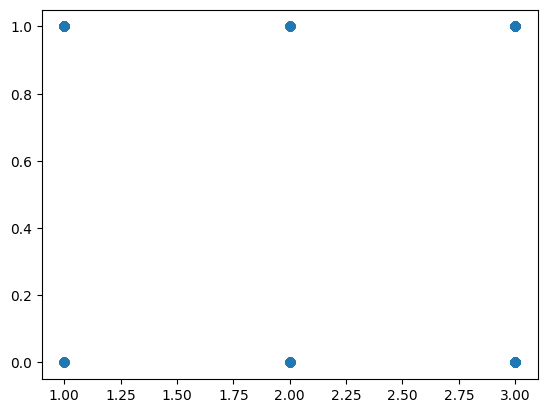

In [ ]:
train_data_pclass = train_data['Pclass'].to_numpy()
train_data_survived = train_data['Survived'].to_numpy()

plt.scatter(train_data_pclass, train_data_survived)


In [ ]:
print(f"Covariance: {np.cov(train_data_pclass, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_pclass, train_data_survived)[0][1]}")

Covariance: -0.13619285764955047
Correlation: -0.3355488593568259


In [ ]:
train_data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.740385
1,male,0.188908


In [ ]:
train_data_sex = train_data['Sex'].to_numpy()
train_data_sex_factorized = pd.factorize(train_data_sex)[0]
train_data_sex_factorized

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [ ]:
print(f"Covariance: {np.cov(train_data_sex_factorized, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_sex_factorized, train_data_survived)[0][1]}")

Covariance: 0.12576004013011866
Correlation: 0.5415849155511687


In [ ]:
train_data_age = train_data['Age'].to_numpy()

print(f"Covariance: {np.cov(train_data_age, train_data_survived)[0][1]}")
print(f"Correlation: {np.corrcoef(train_data_age, train_data_survived)[0][1]}")

Covariance: -0.47088699142138224
Correlation: -0.07467292378981878


# Time Series

In [ ]:
date = pd.Timestamp('2023-01-01')
print(date)

2023-01-01 00:00:00


In [ ]:
date = pd.to_datetime('2023-01-01 2:54:13')
print(date)

2023-01-01 02:54:13


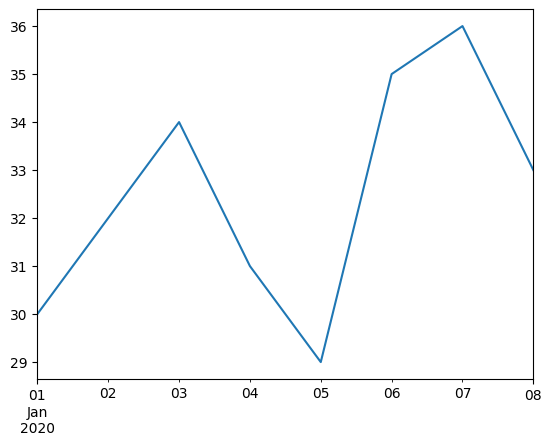

In [ ]:
date = pd.date_range(start='1/1/2020', freq='D', periods=8)
temperature = pd.Series([30, 32, 34, 31, 29, 35, 36, 33], index=date)
temperature.plot()
plt.show()